# 実践コンピュータビジョン
# 3章 画像間の写像
## 3.2 画像の変形
### 3.2.3 画像の位置合わせ

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
%matplotlib inline

In [2]:
import os
from scipy import ndimage
from xml.dom import minidom

In [3]:
import imtools
import imregistration 
import pca

### 3.2.3 顔の画像の位置合わせ
### (1) 顔画像の位置合わせ
imregistrationモジュール内の関数を使って、顔の画像の位置合わせをする。<br>
jkfaces2008_small/jkfaces.xmlと、jkfaces2008_small/\*.jpgを読み込んで、<br>
両目と口の位置合わせを行い、jkfaces2008_small/aligned/\*.jpgに保存します。

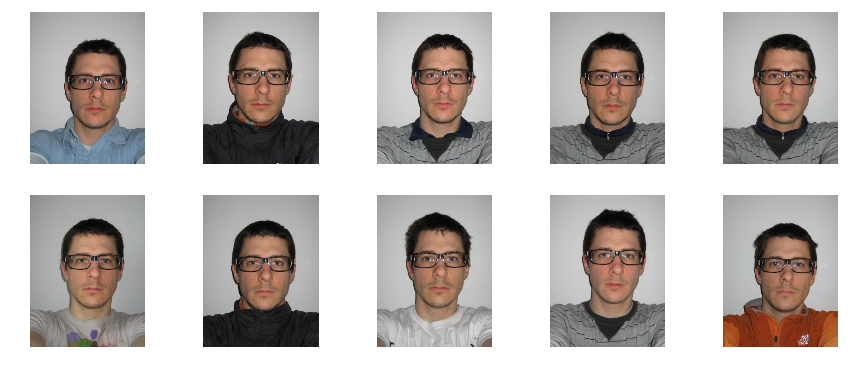

In [4]:
#  顔画像データセットの最初の１０枚を表示する
imlist = imtools.get_imlist('jkfaces_small')
plt.figure(figsize=(15,6))
for i in range(10):
    im = np.array(Image.open(imlist[i]))
    plt.subplot(2,5,i+1)
    plt.imshow(im)
    plt.axis('off')
plt.show()

In [5]:
# 制御点（両目と口の位置座標）を読み込む
xmlFileName = 'jkfaces_small/jkfaces_j.xml' 
faces= imregistration.read_points_from_xml(xmlFileName) 
len(faces)

366

In [6]:
# 位置合わせする
imregistration.rigid_alignment(faces,'jkfaces_small/')

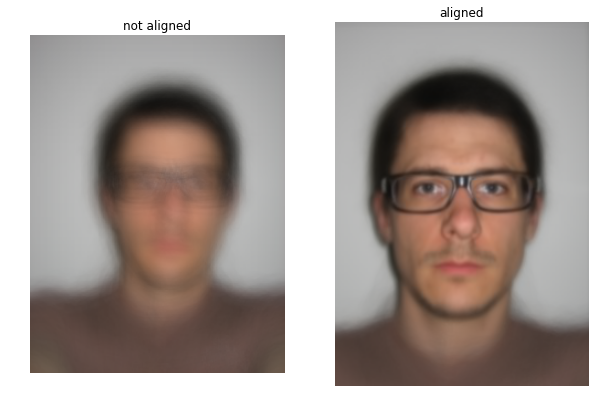

In [7]:
# 3.2.3_averave.py
# jkfaces2008_small/*.jpg の平均画像と、jkfaces2008_small/aligned/*.jpg の平均画像を求めて表示します。

tlist = ['not aligned', 'aligned']
dlist = ['jkfaces_small', 'jkfaces_small/aligned']
plt.figure(figsize=(10,10))
for i, t, dir in zip(range(2), tlist, dlist):
    imlist = imtools.get_imlist(dir)
    # 167個までしかcompute_averageに入らない
    avgimg = imtools.compute_average(sorted(imlist)[:167])
    plt.subplot(1,2,i+1)
    plt.imshow(avgimg)
    plt.axis('off')
    plt.title(t)

plt.show()

### (2) 主成分分析
pcaモジュールを用い、顔画像に楕円形のマスクをかけて主成分分析をした画像を表示する。

/Users/takeshi/pyworks/pcv/pcv_note/chap3/pca.py:24: RuntimeWarning: invalid value encountered in sqrt
  S = sqrt(e)[::-1] # 固有値の並びも反転する


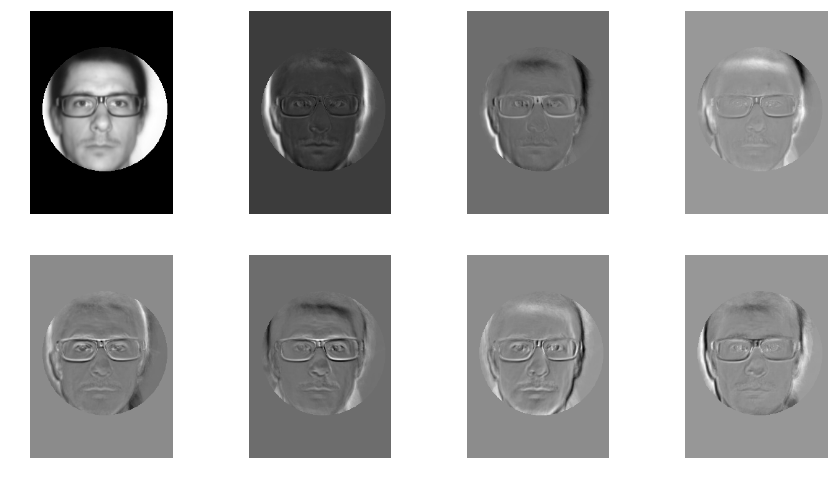

In [8]:
imlist = imtools.get_imlist('jkfaces_small/aligned')
imlist = sorted(imlist)

im = np.array(Image.open(imlist[0]).convert('L')) # サイズを得るため画像を1つ開く
m,n = im.shape[0:2] # 画像のサイズを得る
imnbr = len(imlist) # 画像数の得る

maskim = Image.new('L',(n,m))
draw = ImageDraw.Draw(maskim)
# draw.ellipse((90,100,230,286),fill=1)
draw.ellipse((20,60,220,260),fill=1) # 位置合わせ済み画像用
mask = np.array(maskim).flatten()

# すべての平板化画像を格納する行列を作る
immatrix = np.array([mask*np.array(Image.open(imlist[i]).convert('L')).flatten() 
                  for i in range(150)],'f') 

# 主成分分析を実行する
V,S,immean = pca.pca(immatrix) 

# 画像を表示する（平均と、最初の7つの主成分）
plt.figure(figsize=(15,8)) 
plt.gray() 
plt.subplot(2,4,1) 
plt.imshow(immean.reshape(m,n)) 
plt.axis('off')
for i in range(7):
    plt.subplot(2,4,i+2)
    plt.imshow(V[i].reshape(m,n))
    plt.axis('off')

plt.savefig('jkfaces_average.png')    
plt.show()